# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [67]:
Z = [x[:, i] - x[:, i].mean() for i in range(0, x.shape[1])]

In [47]:
K = np.cov(centered_matrix)

In [30]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [33]:
r = 2
total_dispersion_proportion = sum(eigen_values[:r]) / sum(eigen_values)

In [78]:
U = eigen_vectors[:, :r]

In [80]:
A = np.dot(U.transpose(), Z)

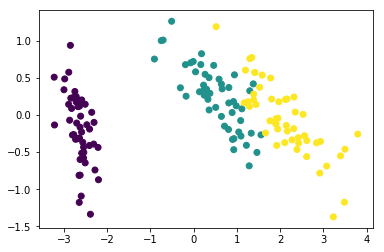

In [82]:
plt.scatter(A[0], A[1], c=y)

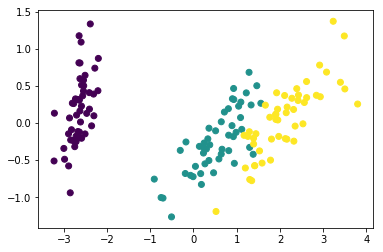

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
dots = pca.fit_transform(x)
plt.scatter(dots[:,0], dots[:,1], c=y)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

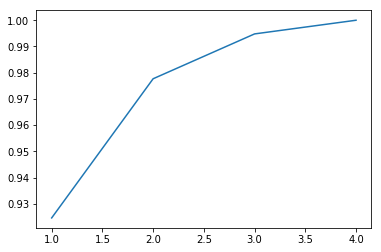

In [100]:

total_dispersion_proportions = [sum(eigen_values[:i]) / sum(eigen_values) for i in range(1, len(eigen_values) + 1)]
total_dispersion_proportions
    
plt.plot(range(1, len(eigen_values) + 1), total_dispersion_proportions)

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [127]:
corrcoefs = [[i, np.corrcoef(A[0], x[:,i])[0][1], np.corrcoef(A[1], x[:,i])[0][1]]for i in range(0, x.shape[1])]

[print("Корреляция со столбцом %d: %f и %f" % (c[0], c[1], c[2])) for c in corrcoefs]

'the end'

Корреляция со столбцом 0: 0.897402 и -0.390604
Корреляция со столбцом 1: -0.398748 и -0.825229
Корреляция со столбцом 2: 0.997874 и 0.048381
Корреляция со столбцом 3: 0.966548 и 0.048782


'the end'